## Problem 2: FramingHam Heart Study
**Import the packages needed**

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

**Import the training set**

In [2]:
heart_train = pd.read_csv("framingham_train_sp24.csv")
heart_train.info()
heart_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2560 non-null   int64  
 1   age              2560 non-null   int64  
 2   education        2560 non-null   object 
 3   currentSmoker    2560 non-null   int64  
 4   cigsPerDay       2560 non-null   int64  
 5   BPMeds           2560 non-null   int64  
 6   prevalentStroke  2560 non-null   int64  
 7   prevalentHyp     2560 non-null   int64  
 8   diabetes         2560 non-null   int64  
 9   totChol          2560 non-null   int64  
 10  sysBP            2560 non-null   float64
 11  diaBP            2560 non-null   float64
 12  BMI              2560 non-null   float64
 13  heartRate        2560 non-null   int64  
 14  glucose          2560 non-null   int64  
 15  TenYearCHD       2560 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 320.1+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,63,Some high school,0,0,0,0,1,0,293,193.0,63.0,30.00,70,76,1
1,1,41,High school/GED,1,40,0,0,0,0,310,117.5,80.0,26.74,80,78,0
2,1,58,Some college/vocational school,0,0,0,0,0,0,250,109.0,78.5,25.26,90,83,0
3,1,43,Some high school,1,43,0,0,0,0,215,122.0,76.0,26.84,85,74,0
4,1,46,College,0,0,0,0,1,0,220,136.5,99.5,27.78,80,70,0


**a) i)**

In [3]:
model_1 = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                       data = heart_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.375973
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.1285
Time:                        22:31:44   Log-Likelihood:                -962.49
converged:                       True   LL-Null:                       -1104.4
Covariance Type:            nonrobust   LLR p-value:                 2.367e-50
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

$f(x) = \frac{1}{1+e^{-(-9.0826-0.1220*education[T.High school/GED]-0.0870*education[T.Some college/vocational school]+0.0519*education[T.Some high school]+0.4217*male+0.0711*age+0.1506*currentSmoker+0.0250*cigsPerDay+0.2873*BPMeds+0.7975*prevalentStroke+0.2215*prevalentHyp-0.0481*diabetes+0.0028*totChol+0.0092*sysBP+0.0077*diaBP+0.0058*BMI-0.0042*heartRate+0.0082*glucose)}}$. $f(x)$ is the conditional probability, $Pr(Y=1|X)$, of experiencing coronary heart disease within 10 years of first examination, $TenYearCHD$, given all the features $x_{i}$.

**a) ii)**

The most impoartant risk factors are those have p-values smaller than or equal to 0.05, which include $male$, $age$, $cigsPerDay$, $totChol$, $sysBP$, and $glucose$. For example, if the patient is male, the predicted odds of developing CHD in the next 10 years will be $e^{0.4217}$, which is approximately 1.52 times higher than that of a female patient, holding all other features constant.

**a) iii)**

The medication should be prescribed to a patient if the expected cost given prescription is less than the expected cost given no prescription.
$$E[cost|prescription] = 1,000,000 * 0.15p + 100,000 * (1-0.15p) = 150,000p + 100,000 - 15,000p = 135,000p + 100,000$$
$$E[cost|no prescription] = 900,000p + 0 * (1-p) = 900,000p$$
$$E[cost|prescription] < E[cost|no prescription]$$
$$135,000\bar{p} + 100,000 < 900,000\bar{p}$$
$$100,000 < 765,000\bar{p}$$
$$\bar{p} > \frac{100}{765} \approx 0.13$$
Therefore, given the health economic analysis, it is optimal to prescribe the medication to a patient if and only if his/her 10-year CHD risk exceeds $\frac{100}{765}$.

**a) iv)**

**Import the testing set**

In [4]:
heart_test = pd.read_csv("framingham_test_sp24.csv")

In [5]:
y_prob = model_1.predict(heart_test)
y_pred = pd.Series([1 if x > 100/765 else 0 for x in y_prob], index=y_prob.index)

In [6]:
y_test = heart_test['TenYearCHD']
print ("\nAccuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 


Accuracy: 0.6202185792349727
Confusion Matrix : 
 [[568 370]
 [ 47 113]]


In [7]:
print ("True Positive Rate (TPR) : \n", cm[1,1]/(cm[1,0]+cm[1,1])) 
print ("False Positive Rate (FPR) : \n", cm[0,1]/(cm[0,0]+cm[0,1])) 

True Positive Rate (TPR) : 
 0.70625
False Positive Rate (FPR) : 
 0.39445628997867804


Accuracy measures the proportion of $TenYearCHD$ that is correctly classified by the model, i.e., model prediction matches with the record in the data, i.e., $Y = \hat{Y} = 1$ (the model predicts the patient will get CHD within 10 years and the record agrees, which is true positive), or $Y = \hat{Y} = 0$ (the model predicts the patient will not get CHD within 10 years and the record agrees, which is true negative); otherwise, the model makes an error, i.e., $Y = 0$ but $\hat{Y} = 1$ (the model predicts the patient will get CHD within 10 years but the record disagrees, which is false positive, or $Y = 1$ but $\hat{Y} = 0$ (the model predicts the patient will not get CHD within 10 years but the record disagrees, which is false negative).

Using model_1, which includes all the features given, the accuracy on the test set is approximately 62%. In other words, given a new instance on a patient, the probability that the model will correctly classify the patient is approximately 62%.

True Positive Rate (TPR) measures the proportion of patients at high risk for CHD indentified by the model, $Pr(\hat{Y}=1)>0.13$, among all the patients who will get CHD in 10 years, $Y = 1$. That is, $TPR = \frac{True  Positives}{All Positives}$, which is approximately 71%. In other words, given a patient who gets CHD in 10 years, the probability that the model will correctly classify the patient is approximately 71%.

False Positive Rate (FPR) measures the proportion of patients at high risk for CHD indentified by the model, $Pr(\hat{Y}=1)>0.13$, among all the patients who will not get CHD in 10 years, $Y = 0$. That is, $FPR = \frac{False Positives}{All Negatives}$, which is approximately 39%. In other words, given a patient who will not get CHD in 10 years, the probability that the model will incorrectly classify the patient is approximately 39%.

**a) v)**

Assume the CHD outcomes in the test set are not affected by the treatment decision.

Total cost: 568 * 0 + 370 * 100,000+ 47 * 900,000 + 113 * 1,000,000 = 192,300,000

Expected economic cost per patient: = 192,300,000 / 1,098 $\approx$ 175,137 dollars.

The assumption is not reasonable. The treatment decision impacts a patient's risk of developing CHD. Let's assume 85% of the patients who were correctly identified as having CHD in 10 years actually will not develop CHD thanks to the medication, i.e., only 15% of true positives will develop CHD in 10 years.

Total cost: 568 * 0 + (370 + 113 * 0.85) * 100,000 + 47 * 900,000 + 113 * 0.15 * 1,000,000 = 105,855,000

Expected economic cost per patient: = 105,855,000 / 1,098 $\approx$ 96,407 dollars.

**a) vi)**

**Simple Baseline Model**

In [8]:
# Accuracy of the baseline model on the test data:
heart_false_test = np.sum(heart_test['TenYearCHD'] == 0)
print('True Negatives:', heart_false_test)
heart_true_test = np.sum(heart_test['TenYearCHD'] == 1)
print('False Negatives:', heart_true_test)
ACC_test = heart_false_test / (heart_false_test + heart_true_test)
print('The accuracy of the baseline model on the test data is', round(ACC_test,4))

# TPR and FPR rates of the baseline model on the test data

TPR = 0                        # TPR = TP/P = TP/(TP+FN)
FPR = 0                        # FPR = FP/N = FP/(FP+TN)
print('The True Positive Rate of the baseline model on the test data is', TPR, 'and the False Positive Rate of the baseline model on the test data is', FPR)

True Negatives: 938
False Negatives: 160
The accuracy of the baseline model on the test data is 0.8543
The True Positive Rate of the baseline model on the test data is 0 and the False Positive Rate of the baseline model on the test data is 0


Total cost: 938 * 0 + 160 * 900,000 = 144,000,000

Expected economic cost per patient: = 144,000,000 / 1,098 $\approx$ 131,148 dollars.

**a) vii)**

$f(x) = \frac{1}{1+e^{-(-9.0826-0.1220*0-0.0870*0+0.0519*0+0.4217*1+0.0711*52+0.1506*1+0.0250*4+0.2873*0+0.7975*0+0.2215*0-0.0481*1+0.0028*180+0.0092*120+0.0077*90+0.0058*26-0.0042*70+0.0082*100)}}$ is approximately 0.14, which is greater than $\hat{p}$ at $\frac{100}{765}$. Therefore, the physician should prescribe the preventive medication for this patient.

**b)**

**ROC curve on the test set**

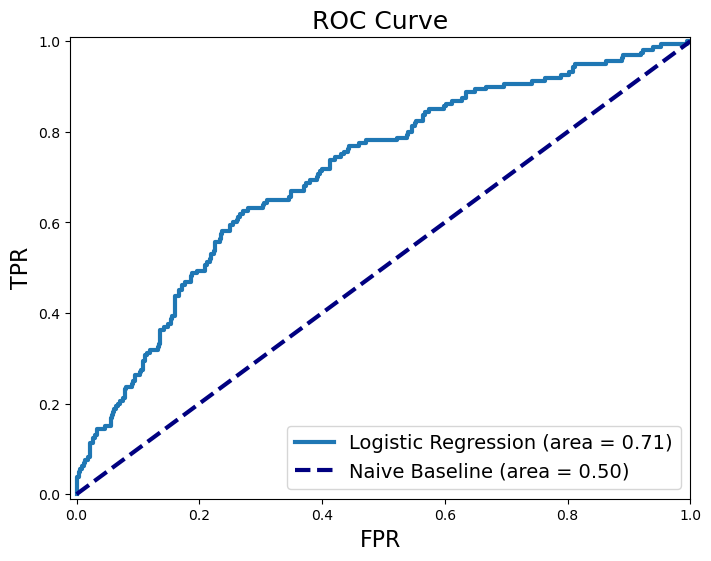

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

TFP and FPR have a tradeoff, i,e., a higher TPR will lead to a higher FPR, but the ideal goal is to achive a high TRP and a low FPR simultaneously. 

ROC curve is very steep when FPR is smaller than 0.3, meaning that TPR could be increased from 0.0 to 0.7 while FPR is only increased from 0.0 to 0.3, i.e., a small decrease in the high threshold value will lead to a larger improvement in the model.

In the future, if there is another medication that has the same level of effectiveness as the current one but much lower costs, decision-makers could consider lower the threshold further more to achieve a higher TPR while maintaining financial viablility for patients.

The AUC for the model on the test set is 0.71.

**c)**

With the new setup, we are assuming that a patient already has insurnace. Therefore, if a patient didn't get medication and got CHD, the cost should be $600,000$ for decreased life quality. If a patient got medication and got CHD, the total cost should be $600,000+C$. If a patient got medication and did not get CHD, the total cost should be $C$.

To be consistent with the previouly examnined "optimal strategy", p should be 100/765. The co-payment $C$ should the amount such that the expected cost given prescription is equal to the expected cost given no prescription.
$$E[cost|prescription] = (600,000+C) * 0.15p + C * (1-0.15p) = 90,000p + C$$
$$E[cost|no prescription] = 600,000p + 0 * (1-p) = 600,000p$$
$$E[cost|prescription] = E[cost|no prescription]$$
$$90,000p + C = 600,000p$$
$$C = 510,000p$$
$$C \approx 66,667$$
Therefore, given the health economic analysis, the insurance company should charge 66,667 dollars as the co-payment for the medication. 

**d)**

The analysis was based on the expected losses between prescribing medication and not presribing medication. The work from the colleague on health economics evaluation could be compeletely wrong, meaning that patients see different values in longevity and health benefits, resulting in various monetized values. Addtionally, prescribing medication to patients with probabilities of having CHD in ten years higher than the predetermined threshold can be deemed as unethical in that it can be seemed as medication are only provided to patients who potentially benefit more from it. This kind of decision-making process also completely ignores the patients' willingness for treatment, i,e., patients predicted with lower probabilities of getting CHD are eager to have proactive treatment and mediaction to prevent the disease.  

To address such concerns, the threshold $\hat{p}$ can be lowered to include patients who have lower probabilities of developing CHD although it would be financially costly.